# Preparation of the Data


To visualize the embedding it is necessary to reduce the dimension of 1536 to only 2 dimension.


### Load library's


In [257]:
import numpy as np
import postgres
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib
import random

### Define data structure


In [258]:
class DataPoint:
    def __init__(self, id:int, name:str, page:int, category, vector:np.array):
        self.id = id
        self.name = name
        self.page = page
        self.category = category
        self.vector = vector
    
    def __str__(self):
        return f"Name: {self.name}\tPage: {self.page}\nCategory: {self.category}\tVector: {self.vector[0:40]}..."

### Loading Data from Database


In [259]:
pg = postgres.PostgresDB()
pg.connect()
response = pg.selectQuery(f"""
                SELECT doc_id, filename, path, doc_segment, embedding_ada002 as vector
                FROM embedding
                JOIN document ON id = doc_id
                --LIMIT 5;""")
pg.disconnect()

In [260]:
data = []

for element in response:
    vector = np.fromstring(element[4][1:-1], dtype=float, sep=',')
    category = element[2].split('/')[1]
    data.append(DataPoint(element[0], element[1], element[3], category, vector))

First 3 entries in `data`:


In [261]:
for i in range(3):
    print(data[i], "\n")

Name: Web AlleFolien.pdf	Page: 722
Category: Webentwicklung	Vector: [ 0.00242375  0.01570454  0.0142606  -0.01347675 -0.02080645  0.03039145
 -0.01944502  0.00889741  0.0060611  -0.03737735  0.0196238   0.01782231
  0.01045136 -0.0200226  -0.00880802  0.01237661  0.02383184 -0.01571829
  0.01552577 -0.0088699   0.00645303  0.00048131  0.01197781  0.00399146
 -0.02418939  0.01663966  0.01738226 -0.01798734 -0.00268332 -0.02934631
  0.02715978 -0.006704   -0.04529838 -0.01684594 -0.01578705  0.00981878
 -0.00335544 -0.00423555  0.00450027  0.02065518]... 

Name: Web AlleFolien.pdf	Page: 725
Category: Webentwicklung	Vector: [ 0.00627456  0.00993361  0.01295048 -0.03952036 -0.02667692  0.00713079
 -0.01030821 -0.01954613 -0.00669264 -0.04546046  0.0069368  -0.00929812
 -0.00873622 -0.02559325 -0.00187133  0.01410104  0.02986102 -0.01353245
  0.01304413  0.01759285 -0.01392712  0.0195595   0.00865595 -0.01204073
 -0.02921885  0.01811462  0.02397444 -0.0063147   0.00214894 -0.0379952
  0.033

In [262]:
matrix = []

for dataPoint in data:
    matrix.append(dataPoint.vector)

matrix = np.array(matrix)

### Reduce Dimensions


In [263]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(10934, 2)

### Visualize Data in a 2D-Plot


In [268]:
categories = []

for dataPoint in data:
    if categories.count(dataPoint.category) == 0:
        categories.append(dataPoint.category)

In [287]:
colormap = plt.get_cmap('jet')

colorDict = {}  # Create an empty dictionary

for i, category in enumerate(categories):
    colorDict[category] = colormap(i / len(categories))

for i in colorDict:
    print(i, colorDict.get(i))

x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

Webentwicklung (0.0, 0.0, 0.5, 1.0)
Analysis (0.0, 0.0, 0.696078431372549, 1.0)
Codierung und Information (0.0, 0.0, 0.909982174688057, 1.0)
Hoehere Mathematik (0.0, 0.03333333333333333, 1.0, 1.0)
Programmieren (0.0, 0.22156862745098038, 1.0, 1.0)
Maschinelles Lernen (0.0, 0.40980392156862744, 1.0, 1.0)
Kommunikations Technik (0.0, 0.5823529411764706, 1.0, 1.0)
Datenstrukturen und Algorithmen (0.0, 0.7705882352941177, 1.0, 1.0)
Software Entwicklung (0.04743833017077798, 0.9588235294117647, 0.920303605313093, 1.0)
Systemnahe Programmierung (0.1865907653383934, 1.0, 0.7811511701454776, 1.0)
Software Security (0.3383934218848829, 1.0, 0.629348513598988, 1.0)
Elektro Technik (0.4901960784313725, 1.0, 0.4775458570524984, 1.0)
Lineare Algebra (0.6293485135989879, 1.0, 0.338393421884883, 1.0)
Datenbank (0.7811511701454774, 1.0, 0.18659076533839347, 1.0)
Theoretische Informatik (0.9203036053130929, 1.0, 0.04743833017077803, 1.0)
Computer Technik (1.0, 0.843137254901961, 0.0, 1.0)
Diskete Mathe

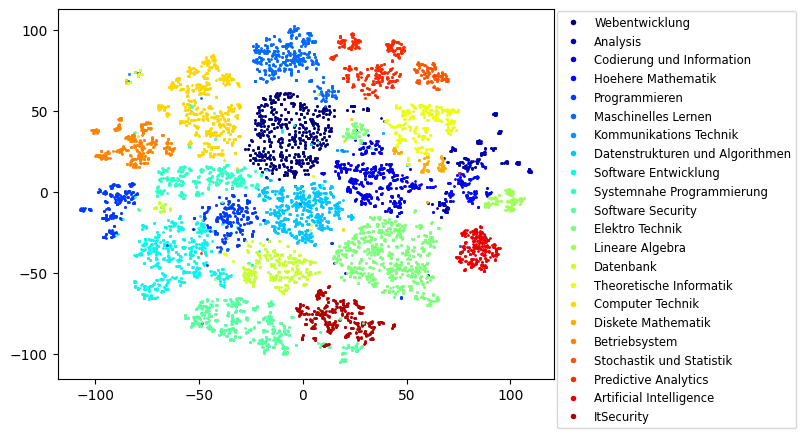

In [288]:
for i in range(len(x)):#
    color = colorDict.get(data[i].category)
    plt.scatter(x[i], y[i], s=1, color=color, label=data[i].category)

handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=5, markerfacecolor=color) for color in colorDict.values()]
labels = colorDict.keys()
plt.legend(handles, labels, loc='upper right', fontsize='small', bbox_to_anchor=(1.5, 1.01))

plt.savefig('plot.svg', format='svg', dpi=1200)